In [1]:
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ehrapy as ep
import numpy as np
import cellrank as cr
from cellrank.kernels import ConnectivityKernel
from cellrank.kernels import PseudotimeKernel
import scvelo as scv
import scanpy as sc

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
Global seed set to 0


In [2]:
import warnings

warnings.filterwarnings("ignore")

# 1- Create adata object, preprocessing and normalisation

In [3]:
#Read in the data
# missing data was imputed with the missMDA package with the imputeMFA function
df = pd.read_csv('./Clinical_luminex_BMqRTPCR_Parasite_nanostring_scaled_complete.csv') #data is not scaled 


In [4]:
df

,PatientID,Clinical_group,Hemoglobin,Hematocrit,RBC,Temperature,RR_admission,RR_age,HR_admission,HR_age,...,PB_PF3D7_1015600,PB_PF3D7_1034400,PB_PF3D7_1106800,PB_PF3D7_1312300,PB_PF3D7_1460800,PB_PF3D7_1249000,PB_PF3D7_1342900,PB_PF3D7_1436700,PB_PF3D7_0306500,PB_PF3D7_0529200
0,ANE1_8888,Moderate anemia,2.184714,1.238679,1.246209,2.090932,-0.593541,-0.280228,1.175113,-0.061688,...,-6.484680e-01,-8.746968e-01,1.754110e+00,-0.662734,-5.226555e-01,2.259585e-01,1.225800e+00,9.146030e-01,-1.129187e+00,1.251330e+00
1,ANE1_8584,Moderate anemia,2.184714,0.133225,0.479166,-0.431848,1.893782,4.486796,-1.681374,2.853683,...,-4.760000e-11,-1.650000e-11,-2.360000e-11,0.000000,-2.370000e-10,2.150000e-10,1.570000e-10,4.360000e-11,-6.040000e-11,6.530000e-11
2,ANE1_8614,Moderate anemia,1.886827,1.496260,1.287897,-0.972444,0.310940,0.237671,-1.526970,0.071434,...,-4.760000e-11,-1.650000e-11,-2.360000e-11,0.000000,-2.370000e-10,2.150000e-10,1.570000e-10,4.360000e-11,-6.040000e-11,6.530000e-11
3,ANE1_8891,Moderate anemia,1.539291,-1.680578,-1.696904,-1.062543,-0.254360,-0.282630,0.789101,-0.169454,...,1.353679e+00,3.008211e-01,-9.739407e-01,-0.503687,-1.880740e-01,4.541708e-01,2.290917e-01,-1.501779e+00,8.688413e-01,-1.544700e+00
4,ANE1_8864,Moderate anemia,1.489643,0.809376,1.104473,-0.071451,-0.480481,-0.209605,-0.175928,-0.112996,...,-2.327003e+00,3.202557e+00,-1.850884e+00,0.767621,2.299304e+00,4.042700e-01,-9.808324e-01,1.066799e+00,1.955686e+00,1.625428e+00
5,ANE1_8549,Moderate anemia,0.893869,1.013295,1.471320,1.460237,-0.670818,-0.408483,1.414872,-0.478927,...,-4.760000e-11,-1.650000e-11,-2.360000e-11,0.000000,-2.370000e-10,2.150000e-10,1.570000e-10,4.360000e-11,-6.040000e-11,6.530000e-11
6,ANE1_8935,Moderate anemia,0.893869,0.927434,0.979412,-0.972444,-0.254360,-0.406772,-0.060125,-0.463336,...,-1.211587e+00,1.272961e-01,9.766622e-01,-0.842675,-8.315200e-01,2.392319e-01,7.584960e-01,3.630098e-01,-1.490836e+00,-9.880998e-02
7,ANE1_8685,Moderate anemia,0.645629,-0.746845,-0.729762,0.379046,1.328481,1.707293,1.252315,2.642907,...,-1.909149e+00,-1.385740e+00,-1.186955e+00,1.331134,3.621272e+00,1.783407e+00,1.158775e+00,2.257323e+00,3.205215e+00,3.363267e+00
8,ANE1_8689,Moderate anemia,0.298094,3.192005,2.363425,-1.873437,-0.367420,-0.291758,0.634696,-0.185513,...,7.187114e-01,-2.479854e+00,1.509508e+00,-0.149772,2.904467e-01,-1.875714e+00,-1.430760e+00,2.819469e+00,7.974734e-02,8.883022e-01
9,ANE1_8589,Moderate anemia,0.248446,0.079562,0.270730,-0.702146,1.893782,2.793536,1.213714,3.752996,...,-4.760000e-11,-1.650000e-11,-2.360000e-11,0.000000,-2.370000e-10,2.150000e-10,1.570000e-10,4.360000e-11,-6.040000e-11,6.530000e-11


In [5]:
adata = ep.ad.df_to_anndata(
    df, index_column="PatientID"
)

2024-03-04 19:02:42,496 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `36` x `1001`.


In [6]:
adata

AnnData object with n_obs × n_vars = 36 × 1001
    var: 'ehrapy_column_type'
    layers: 'original'

In [7]:
adata.var[adata.var["ehrapy_column_type"] == "non_numeric"]

,ehrapy_column_type
Clinical_group,non_numeric


In [8]:
adata = ep.pp.encode(adata, encodings={"one-hot": ["Clinical_group"]})

2024-03-04 19:02:46,802 - root INFO - The original categorical values `['Clinical_group']` were added to uns.


Output()

2024-03-04 19:02:46,818 - root INFO - Updated the original layer after encoding.
2024-03-04 19:02:46,822 - root INFO - The original categorical values `['Clinical_group']` were added to obs.


In [9]:
adata.layers["original"]

array([[ 1.0000000e+00,  0.0000000e+00,  2.1847141e+00, ...,
         9.1460294e-01, -1.1291871e+00,  1.2513301e+00],
       [ 1.0000000e+00,  0.0000000e+00,  2.1847141e+00, ...,
         4.3599999e-11, -6.0399998e-11,  6.5300002e-11],
       [ 1.0000000e+00,  0.0000000e+00,  1.8868266e+00, ...,
         4.3599999e-11, -6.0399998e-11,  6.5300002e-11],
       ...,
       [ 0.0000000e+00,  1.0000000e+00, -2.3828933e+00, ...,
        -3.9908031e-01, -8.8225865e-01, -7.0515060e-01],
       [ 0.0000000e+00,  1.0000000e+00, -1.0012954e+00, ...,
        -5.6223243e-01, -2.0292811e-01, -4.7744673e-01],
       [ 0.0000000e+00,  1.0000000e+00, -9.9089630e-02, ...,
        -2.0810130e-01, -7.0688590e-02, -1.1766777e-01]], dtype=float32)

In [10]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 36 obs and 1002 vars
╠══ 🔐 Encoded variables
║   ╚══ Clinical_group -> 2 categories; one-hot encoded; original data type: string
╚══ 🔓 Unencoded variables
    ╠══ Hemoglobin -> data type: floating
    ╠══ Hematocrit -> data type: floating
    ╠══ RBC -> data type: floating
    ╠══ Temperature -> data type: floating
    ╠══ RR_admission -> data type: floating
    ╠══ RR_age -> data type: floating
    ╠══ HR_admission -> data type: floating
    ╠══ HR_age -> data type: floating
    ╠══ Glyceamia -> data type: floating
    ╠══ MUAC -> data type: floating
    ╠══ Plasma_iron -> data type: floating
    ╠══ TIBC -> data type: floating
    ╠══ Sat_Transf -> data type: floating
    ╠══ Transferrin -> data type: floating
    ╠══ sTfR -> data type: floating
    ╠══ Ferritin -> data type: floating
    ╠══ TfRF_index -> data type: floating
    ╠══ EPO -> data type: floating
    ╠══ Folate -> data type: floating
    ╠══ VitA -> data type: floating
    ╠══ VitB12 -> data type: floating
    ╠══ LDH -> data type: floating
    ╠══ CRP -> data type: floating
    ╠══ Albumin -> data type: floating
    ╠══ Prealbumin -> data type: floating
    ╠══ Haptoglobin -> data type: floating
    ╠══ Ferritin_CRP_ratio -> data type: floating
    ╠══ WBC -> data type: floating
    ╠══ MCV_fL -> data type: floating
    ╠══ MCH_pg -> data type: floating
    ╠══ MCHC_g_dL -> data type: floating
    ╠══ RBC_width_sd_fL -> data type: floating
    ╠══ Neutrophils -> data type: floating
    ╠══ Lymphocytes -> data type: floating
    ╠══ NLCR -> data type: floating
    ╠══ Platelets -> data type: floating
    ╠══ PB_parasitemia -> data type: floating
    ╠══ PB_density -> data type: floating
    ╠══ BM_density -> data type: floating
    ╠══ BM_parasitemia -> data type: floating
    ╠══ BM_asexual_dens -> data type: floating
    ╠══ BM_gam_dens -> data type: floating
    ╠══ BM_gam_asex_ratio -> data type: floating
    ╠══ pLDH -> data type: floating
    ╠══ Ang1 -> data type: floating
    ╠══ Ang2 -> data type: floating
    ╠══ Ang2_Ang1_ratio -> data type: floating
    ╠══ ICAM1 -> data type: floating
    ╠══ VCAM1 -> data type: floating
    ╠══ E_selectin -> data type: floating
    ╠══ P_selectin -> data type: floating
    ╠══ Syndecan1 -> data type: floating
    ╠══ VEGF -> data type: floating
    ╠══ TNFa -> data type: floating
    ╠══ IL1a -> data type: floating
    ╠══ IL1b -> data type: floating
    ╠══ IL6 -> data type: floating
    ╠══ IL8 -> data type: floating
    ╠══ IL10 -> data type: floating
    ╠══ TNF_IL10_ratio -> data type: floating
    ╠══ IFNg -> data type: floating
    ╠══ IL27 -> data type: floating
    ╠══ G_CSF -> data type: floating
    ╠══ GM_CSF -> data type: floating
    ╠══ M_CSF -> data type: floating
    ╠══ IL11 -> data type: floating
    ╠══ TPO -> data type: floating
    ╠══ Ftl_3L -> data type: floating
    ╠══ IL7 -> data type: floating
    ╠══ IL15 -> data type: floating
    ╠══ IL21 -> data type: floating
    ╠══ IL3 -> data type: floating
    ╠══ OPN -> data type: floating
    ╠══ SCF -> data type: floating
    ╠══ cKit -> data type: floating
    ╠══ CCL2 -> data type: floating
    ╠══ CCL5 -> data type: floating
    ╠══ CCL11 -> data type: floating
    ╠══ ANGPT2 -> data type: floating
    ╠══ CCL2.1 -> data type: floating
    ╠══ CCL5.1 -> data type: floating
    ╠══ CSF3 -> data type: floating
    ╠══ EPO.1 -> data type: floating
    ╠══ IFNB1 -> data type: floating
    ╠══ IFNG -> data type: floating
    ╠══ SDC1 -> data type: floating
    ╠══ SELP -> data type: floating
    ╠══ VCAM1.1 -> data type: floating
    ╠══ VEGFA -> data type: floating
    ╠══ BM_PF3D7_1322100 -> data type: floating
    ╠══ BM_PF3D7_1323700 -> data type: floating
    ╠══ BM_PF3D7_1337000 -> data type: floating
    ╠══ BM_PF3D7_1338100 -> data type: floating
    ╠══ BM_PF3D7_1346300 -> data type: floating
    ╠══ BM_PF3D7_1348300 -> data type: floating
    ╠══ BM_PF3D7_1351100 -> data type: floating
    ╠══ B

In [ ]:
# in the tutorial, the data was not normalised, but try here with normalised data
adata_norm = ep.pp.scale_norm(adata, copy=True)

# Dimensionality reduction

Principle Component Analysis (PCA)

In [11]:
ep.pp.pca(adata)

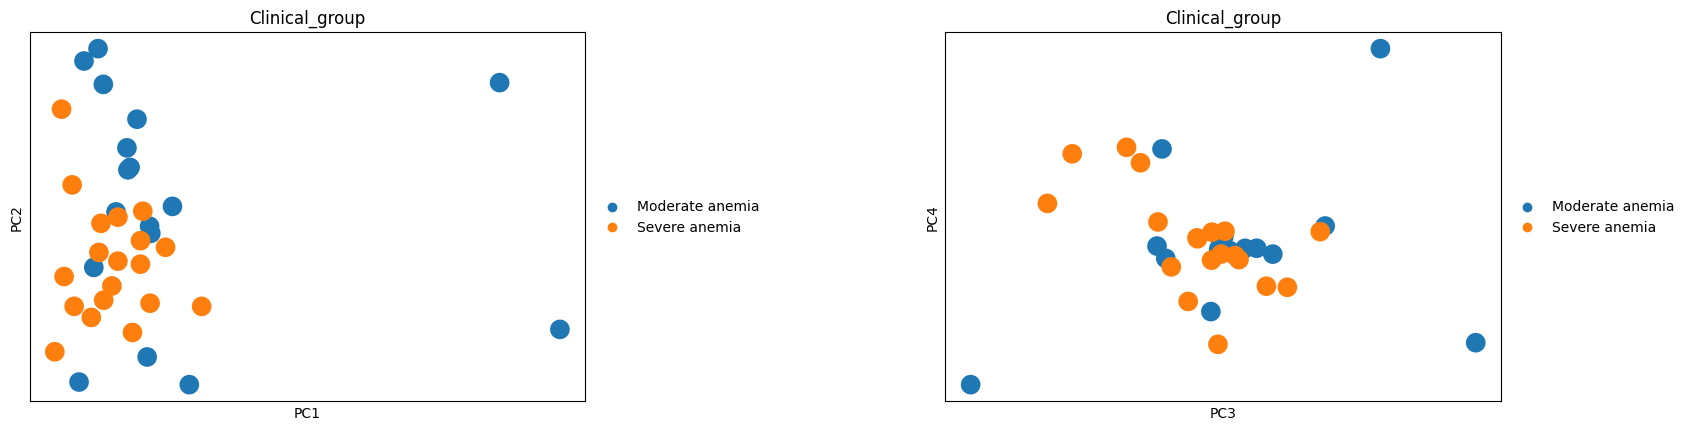

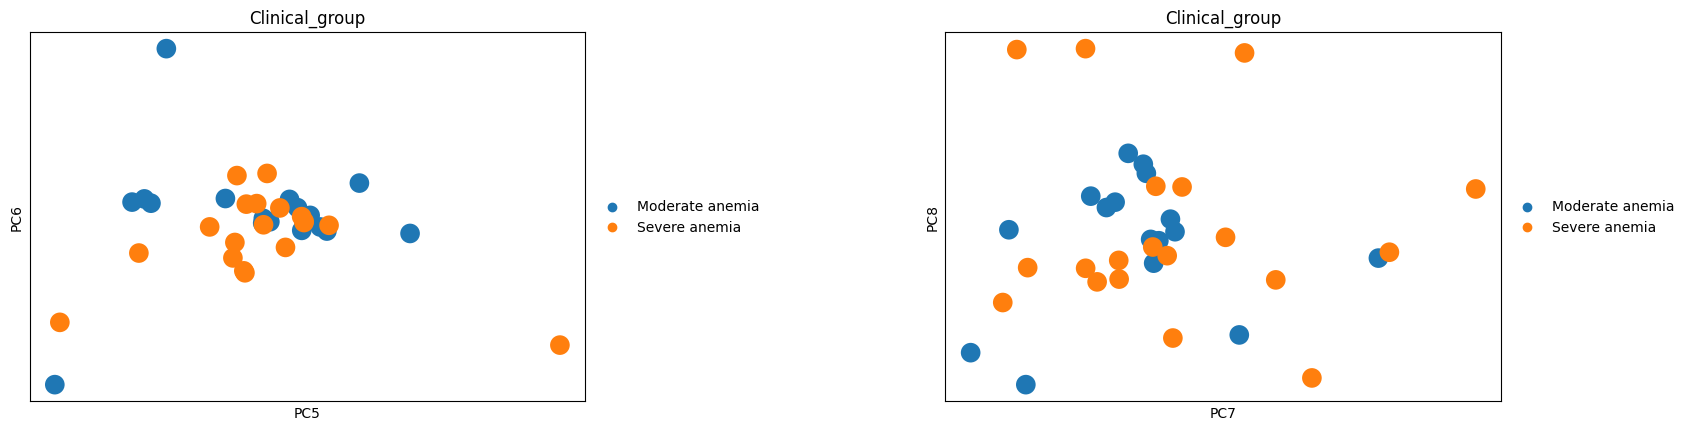

In [13]:
ep.pl.pca(adata, color="Clinical_group", components=["1,2", "3,4"], size=800, wspace=0.5)
ep.pl.pca(adata, color="Clinical_group", components=["5,6", "7,8"], size=800, wspace=0.5)

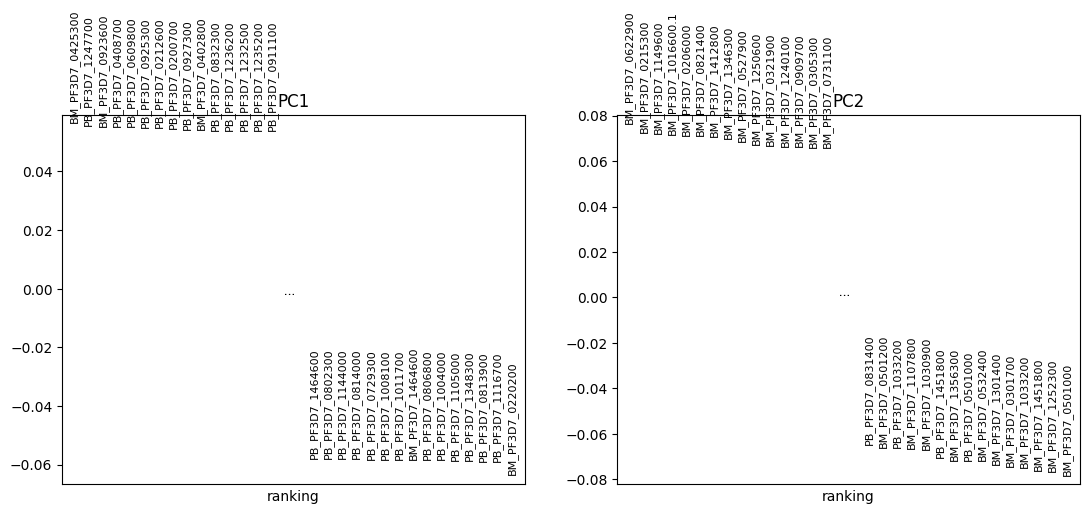

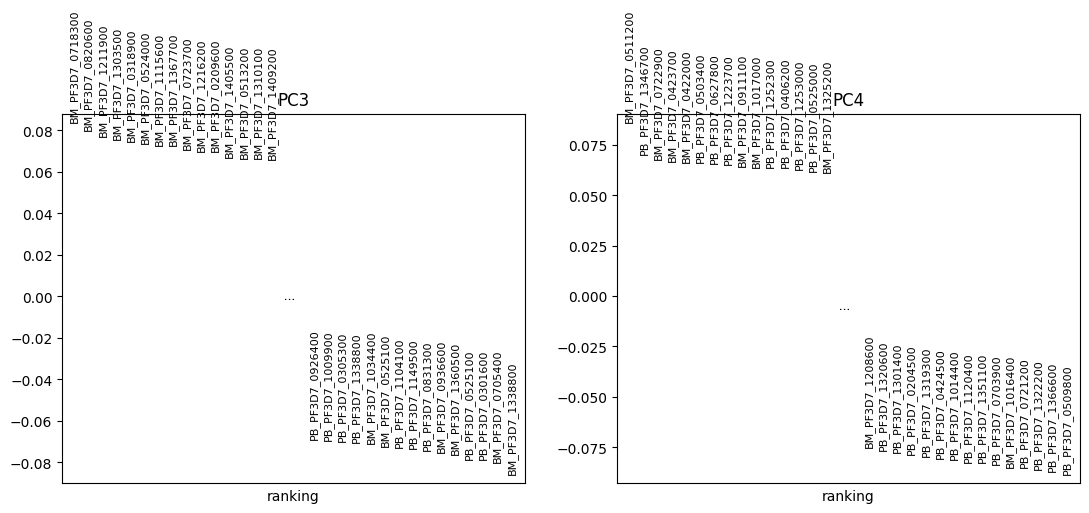

In [14]:
ep.pl.pca_loadings(adata, components="1, 2")
ep.pl.pca_loadings(adata, components="3, 4")

UMAP

In [15]:
ep.pp.neighbors(adata, n_pcs=10)
ep.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


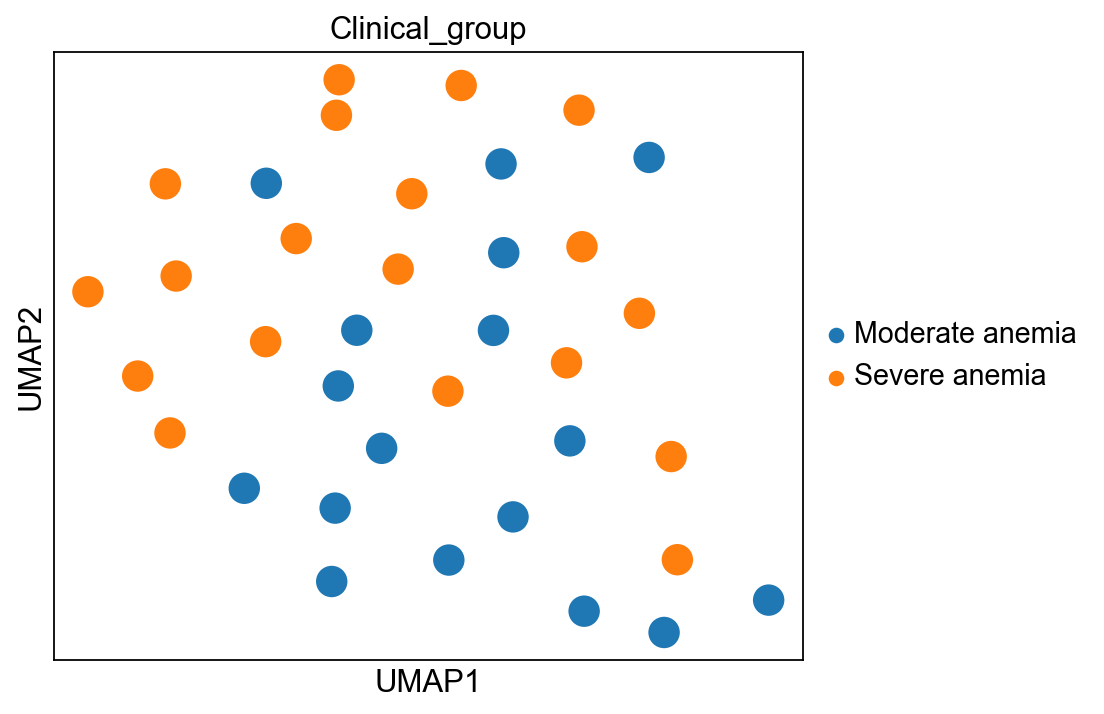

In [16]:
# Checking for Batch effects
ep.settings.set_figure_params(figsize=(6, 5))
ep.pl.umap(
    adata,color=["Clinical_group"],
    wspace=0.5, size=800, title=["Clinical_group"],
)

In [23]:
ep.tl.leiden(adata, resolution=1.5, key_added="leiden_1.5")

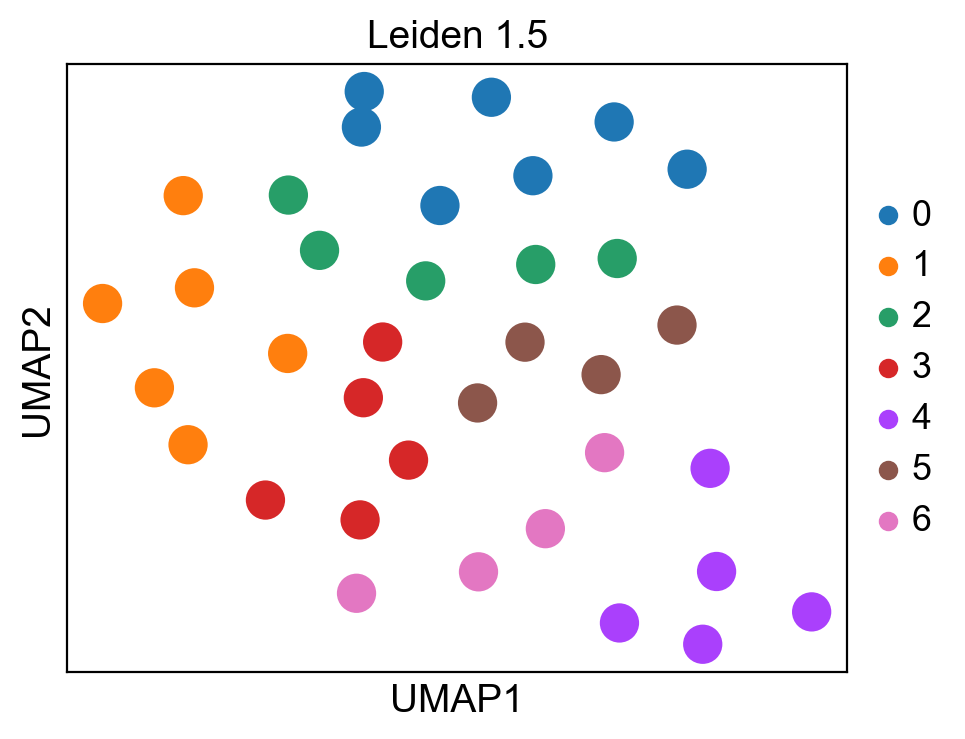

In [24]:
ep.settings.set_figure_params(figsize=(5, 4), dpi=100)
ep.pl.umap(adata, color=["leiden_1.5"], title="Leiden 1.5", size=800)

In [ ]:
ep.io.write("Clinical_luminex_BMqRTPCR_complete_scaled.h5ad", adata_norm)

In [9]:
adata_norm = sc.read('./Clinical_luminex_BMqRTPCR_complete_scaled.h5ad')

In [10]:
adata_norm

AnnData object with n_obs × n_vars = 36 × 91
    obs: 'Clinical_group'
    var: 'ehrapy_column_type'
    uns: 'Clinical_group_colors', 'encoding_to_var', 'neighbors', 'normalization', 'original_values_categoricals', 'pca', 'umap', 'var_to_encoding'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'original', 'raw_norm'
    obsp: 'connectivities', 'distances'

# Determining patient fate

Pseudotime calculation

In [36]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden_1.5"] == "3")[0]
ep.tl.dpt(adata, min_group_size=2)

In [35]:
?ep.tl.dpt

In [44]:
from cellrank.kernels import PseudotimeKernel

pk = PseudotimeKernel(adata, time_key="dpt_pseudotime")

In [45]:
pk.compute_transition_matrix()

  0%|          | 0/36 [00:00<?, ?cell/s]

PseudotimeKernel[n=36, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [46]:
adata

AnnData object with n_obs × n_vars = 36 × 1002
    obs: 'Clinical_group', 'leiden_1', 'leiden_2', 'leiden_1.5', 'dpt_pseudotime'
    var: 'ehrapy_column_type'
    uns: 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding', 'pca', 'Clinical_group_colors', 'neighbors', 'umap', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'leiden_1.5_colors', 'iroot', 'diffmap_evals', 'T_fwd_params'
    obsm: 'X_pca', 'X_umap', 'X_diffmap', 'T_fwd_umap'
    varm: 'PCs'
    layers: 'original'
    obsp: 'distances', 'connectivities'

In [43]:
ep.settings.set_figure_params(figsize=(5, 4), dpi=100)
pk.plot_projection(basis="umap", color="leiden_1.5")

ValueError: Expected n_neighbors > 0. Got 0

In [48]:
g = cr.estimators.GPCCA(pk)
g.fit(cluster_key="leiden_1.5")
g.macrostates_memberships

ValueError: You've selected `30` cells, please decrease this to at most `18` cells for your dataset.